In [23]:
! python3 trainfix.py -d /home/chaos/Documents/ChaosAIVision/Build-YOLO-v1-from-scratch/data.yaml -b 8 -e 100


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Loading backbone pretrain successfully !
Loading training images ...
Loading Cache: 100%|██████████████████| 8524/8524 [00:00<00:00, 107351.21file/s]
Cache saved to /home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels.cache
Loading valid images ...
Loading Cache: 100%|██████████████████| 2460/2460 [00:00<00:00, 109889.75file/s]
Cache saved to /home/chaos/Documents/ChaosAIVision/dataset/yolo_train/valid/labels.cache
Results will be saved at /home/chaos/Documents/ChaosAIVision/yolo_output/result1
Epochs: 1/100: 100%|██████████| 1066/1066 [04:05<00:00,  4.35it/s, loss=63.9204]

Train 	 loss: 161.3188695890 	 mAP: 0.0725758768

Epochs: 1/100: 100%|████████████| 308/308 [00:22<00:00, 13.47it/s, loss=24.8535]

Test 	 loss: 63.3761202

In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image_and_labels(image_path, label_path):
    # Đọc ảnh sử dụng OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Đọc file nhãn
    boxes = []
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            boxes.append([class_id, x_center, y_center, width, height])
    
    return image, boxes


In [39]:
def plot_image_with_boxes(image, boxes):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    h, w, _ = image.shape

    for box in boxes:
        class_id, x_center, y_center, width, height = box

        # Tính toán tọa độ của bounding box
        upper_left_x = (x_center - width / 2) * w
        upper_left_y = (y_center - height / 2) * h
        rect_width = width * w
        rect_height = height * h

        # Tạo hình chữ nhật (bounding box)
        rect = patches.Rectangle((upper_left_x, upper_left_y), rect_width, rect_height, 
                                 linewidth=2, edgecolor='r', facecolor='none')

        ax.add_patch(rect)
        ax.text(upper_left_x, upper_left_y, f"Class: {int(class_id)}", 
                bbox=dict(facecolor='yellow', alpha=0.5))

    plt.show()


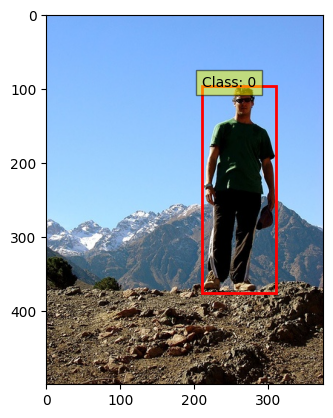

In [41]:
def main(image_path, label_path):
    # Đọc ảnh và nhãn
    image, boxes = load_image_and_labels(image_path, label_path)

    # Trực quan hóa ảnh với bounding box
    plot_image_with_boxes(image, boxes)

if __name__ == "__main__":
    image_path = "/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/images/2007_004454.jpg"
    label_path = "/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/2007_004454.txt"
    main(image_path, label_path)


In [16]:
import os

def check_yolo_labels(directory):
    """ Check all label files in the specified directory for values outside the [0.0, 1.0] range. """
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            path = os.path.join(directory, filename)
            print(path)
            with open(path, 'r') as file:
                for line in file:
                    parts = line.strip().split()
                    # Skip if the line is empty or malformed
                    if len(parts) < 5:
                        continue
                    # Extract the bbox values
                    x_center, y_center, width, height = map(float, parts[1:5])
                    # Check if any values are out of the expected range
                    if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
                        print(f"Invalid bbox values in {path}: {line.strip()}")

# Example usage:
directory = "/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels"
check_yolo_labels(directory)


/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/2011_001235.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.769.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/dog.3461.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.2972.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.710.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.1721.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.1574.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/2012_002155.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.2328.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/cat.3128.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/dog.2880.txt
/home/chaos/Documents/ChaosAIVision/dataset/yolo_train/train/labels/2012_004291.txt
/home/chaos/Documents